In [1]:
import matplotlib.pyplot as plt
import numpy as np

import graythresh

from skimage import segmentation
from skimage import morphology
from skimage import feature 
from skimage import io
from skimage import color


from scipy import ndimage
import cv2 

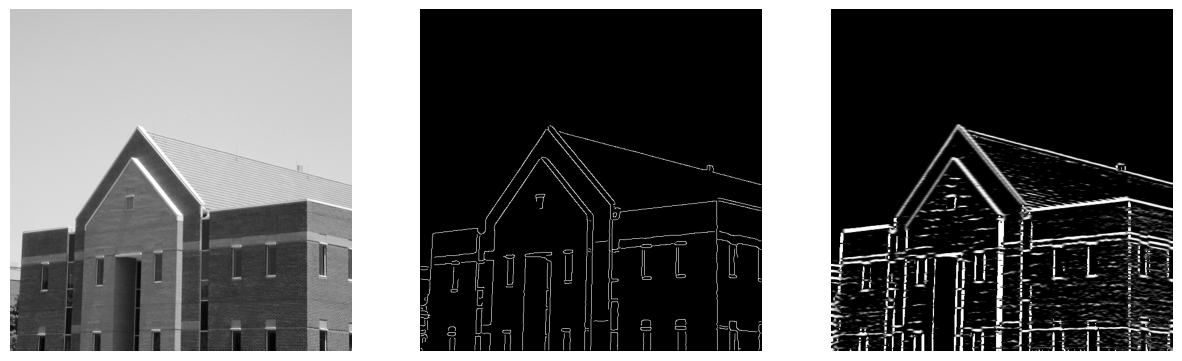

In [2]:
f1 = plt.imread('pic.3.tif')

canny = feature.canny(f1, sigma=2)
log = ndimage.gaussian_laplace(f1, sigma=2) 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(15)
fig.set_figwidth(15)

for axe in fig.get_axes():
    axe.axis('off')

ax1.imshow(f1, cmap='gray')
ax2.imshow(canny, cmap='gray')
ax3.imshow(log, cmap='gray')

plt.show()

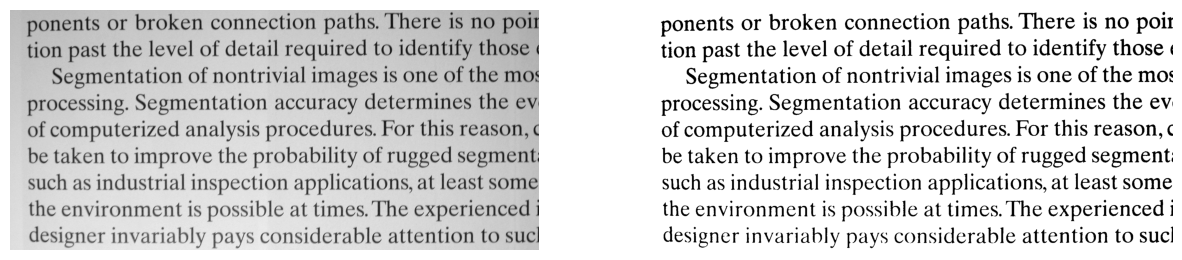

In [11]:
f2 = plt.imread('pic.4.tif')

# lvl = 255 * graythresh.graythresh(f2)

# ret2, th2 = cv2.threshold(f2,lvl, 255, cv2.THRESH_BINARY)

lvl = 255 * graythresh.graythresh(f2)

th2 = f2 > lvl

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(15)
fig.set_figwidth(15)

for axe in fig.get_axes():
    axe.axis('off')

ax1.imshow(f2, cmap='gray')
ax2.imshow(th2, cmap='gray')

plt.show()


C:\Users\droni\AppData\Local\Temp\ipykernel_16072\174905911.py:13: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = feature.peak_local_max(f_dis, indices=False, min_distance=20, labels=thresh)


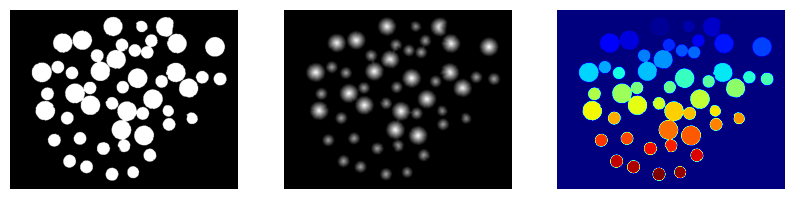

In [4]:
f3 = plt.imread('pic.5.tif')

f3 = color.rgb2gray(color.rgba2rgb(f3))

f3 = (1 * (f3 >= 0.396078431372549))

thresh = np.copy(f3)

f3 = -f3

f_dis = ndimage.distance_transform_edt(f3)

local_max = feature.peak_local_max(f_dis, indices=False, min_distance=20, labels=thresh)

markers = ndimage.label(local_max, structure=np.ones((3,3)))[0]

L = segmentation.watershed(-f_dis, markers, mask=thresh)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(10)
fig.set_figwidth(10)

for axe in fig.get_axes():
    axe.axis('off')

ax1.imshow(thresh, cmap='gray')
ax2.imshow(f_dis, cmap='gray')
ax3.imshow(L, cmap='jet')

plt.show()

C:\Users\droni\AppData\Local\Temp\ipykernel_16072\2979101091.py:10: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = feature.peak_local_max(grad, indices=False, min_distance=15)


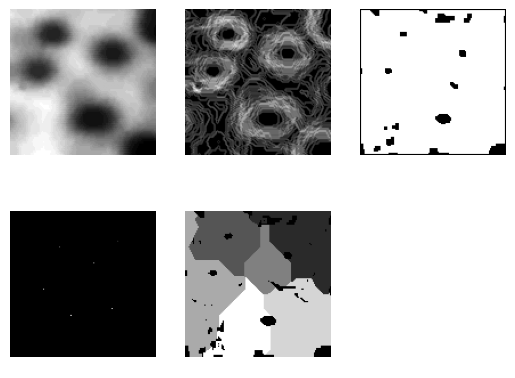

In [15]:
f4 = plt.imread('pic.6.tif')

f4 = color.rgb2gray(color.rgba2rgb(f4))

grad = ndimage.gaussian_gradient_magnitude(f4, sigma=0.5)

grad_op = ndimage.binary_opening(grad, np.ones((3,3)))
grad_closed = ndimage.binary_closing(grad_op, np.ones((3,3)))

local_max = feature.peak_local_max(grad, indices=False, min_distance=15)
markers = ndimage.label(local_max, structure=np.ones((3,3)))[0]

shed = segmentation.watershed(grad_closed, markers, mask=grad)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)


for axe in fig.get_axes():
    axe.axis('off')

ax1.imshow(f4, cmap='gray')
ax2.imshow(grad, cmap='gray')
ax3.imshow(grad_closed, cmap='gray')
ax4.imshow(markers, cmap='gray')
ax5.imshow(shed, cmap='gray')

plt.show()

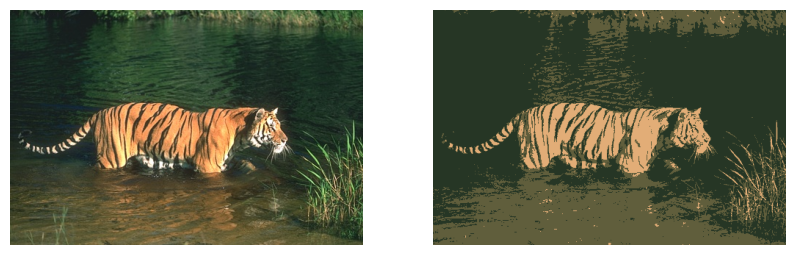

In [6]:
f5 = plt.imread('pic.8.jpg')

pixel_vals = f5.reshape((-1,3))

pixel_vals = np.float32(pixel_vals)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)

segmented_data = centers[labels.flatten()]

segmented_image = segmented_data.reshape((f5.shape))

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(10)
fig.set_figwidth(10)

for axe in fig.get_axes():
    axe.axis('off')

ax1.imshow(f5)
ax2.imshow(segmented_image)

plt.show()